In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
heart=pd.read_csv('heartdisease.csv')

In [80]:
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [81]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [83]:
heart.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [84]:
heart["cigsPerDay"].fillna(heart.groupby("currentSmoker")["cigsPerDay"].transform("mean"),inplace=True)

In [85]:
heart["BPMeds"].fillna(heart.groupby("prevalentHyp")["BPMeds"].transform("mean"),inplace=True)

In [86]:
heart["totChol"].fillna(heart.groupby("prevalentStroke")["totChol"].transform("mean"), inplace=True)

In [87]:
heart["BMI"].fillna(heart.groupby("age")["BMI"].transform("mean"), inplace=True)

In [88]:
heart["heartRate"].fillna(heart.groupby("sysBP")["heartRate"].transform("mean"), inplace=True)

In [89]:
heart["glucose"].fillna(heart.groupby("diabetes")["glucose"].transform("mean"), inplace=True)

In [90]:
heart["education"].fillna(heart.groupby("age")["education"].transform("mean"), inplace=True)

In [91]:
heart.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [92]:
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<AxesSubplot:>

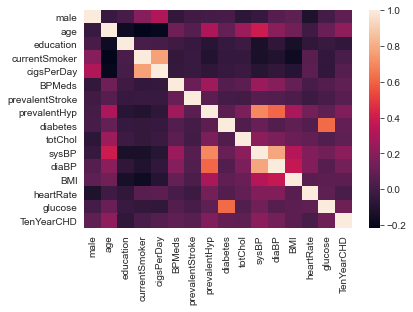

In [93]:
sns.heatmap(heart.corr())

In [94]:
heart.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017374,0.197596,0.316723,-0.052461,-0.004546,0.005313,0.015708,-0.069974,-0.035989,0.057933,0.081360,-0.116530,0.007070,0.088428
age,-0.028979,1.000000,-0.168023,-0.213748,-0.192113,0.123672,0.057655,0.307194,0.101258,0.260270,0.394302,0.206104,0.136934,-0.012716,0.115089,0.225256
education,0.017374,-0.168023,1.000000,0.019839,0.009392,-0.011080,-0.035054,-0.081672,-0.039031,-0.023047,-0.129428,-0.061637,-0.136731,-0.052922,-0.033518,-0.053798
currentSmoker,0.197596,-0.213748,0.019839,1.000000,0.770799,-0.049649,-0.032988,-0.103260,-0.044295,-0.046285,-0.130230,-0.107746,-0.167485,0.062409,-0.052519,0.019456
cigsPerDay,0.316723,-0.192113,0.009392,0.770799,1.000000,-0.047583,-0.033052,-0.066612,-0.037859,-0.025096,-0.088275,-0.055851,-0.092426,0.075610,-0.053701,0.056411
BPMeds,-0.052461,0.123672,-0.011080,-0.049649,-0.047583,1.000000,0.116096,0.263010,0.051746,0.080154,0.255078,0.194691,0.100357,0.015555,0.048369,0.087756
prevalentStroke,-0.004546,0.057655,-0.035054,-0.032988,-0.033052,0.116096,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.029927,-0.017680,0.018060,0.061810
prevalentHyp,0.005313,0.307194,-0.081672,-0.103260,-0.066612,0.263010,0.074830,1.000000,0.077808,0.163041,0.696755,0.615751,0.301521,0.147312,0.082281,0.177603
diabetes,0.015708,0.101258,-0.039031,-0.044295,-0.037859,0.051746,0.006949,0.077808,1.000000,0.040092,0.111283,0.050329,0.086346,0.048983,0.625062,0.097317
totChol,-0.069974,0.260270,-0.023047,-0.046285,-0.025096,0.080154,0.000067,0.163041,0.040092,1.000000,0.207609,0.163903,0.113794,0.090651,0.043957,0.081624


In [95]:
heart_fill = heart

array([[<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>],
       [<AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>]], dtype=object)

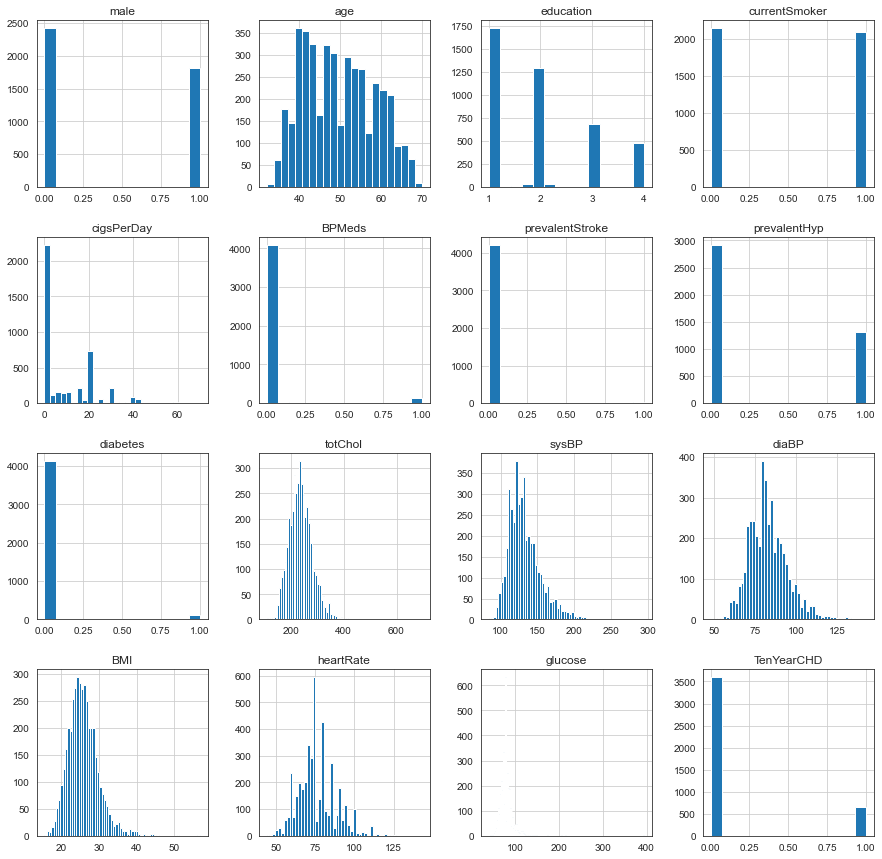

In [96]:
 heart_fill.hist(bins='auto', figsize=(15,15))

<AxesSubplot:>

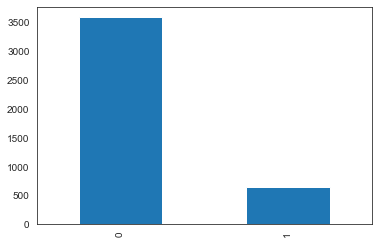

In [97]:
heart_fill['TenYearCHD'].value_counts().plot(x =heart_fill['TenYearCHD'], kind='bar')

In [98]:
heart_fill['TenYearCHD'].value_counts(normalize=True) * 100

0    84.804153
1    15.195847
Name: TenYearCHD, dtype: float64

<AxesSubplot:xlabel='gender', ylabel='count'>

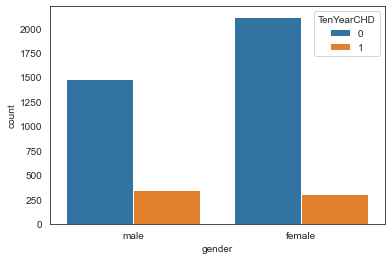

In [99]:
heart_fill_plot = heart_fill.copy()
heart_fill_plot['male']  = heart_fill_plot['male'].replace({0: 'female', 1:'male'})
heart_fill_plot = heart_fill_plot.rename(columns={'male':'gender'})
sns.countplot(data=heart_fill_plot, x='gender', hue='TenYearCHD')

In [100]:
heart_fill[heart_fill['TenYearCHD']==1]['male'].value_counts(normalize = True) * 100

1    53.26087
0    46.73913
Name: male, dtype: float64

In [101]:
heart_fill[heart_fill['TenYearCHD']==0]['male'].value_counts(normalize = True) * 100

0    58.931553
1    41.068447
Name: male, dtype: float64

<AxesSubplot:xlabel='diabetes', ylabel='count'>

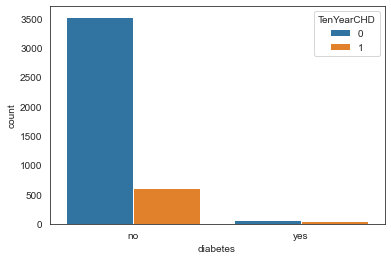

In [102]:
heart_fill_plot['diabetes']  = heart_fill_plot['diabetes'].replace({0: 'no', 1:'yes'})
sns.countplot(data=heart_fill_plot, x='diabetes', hue='TenYearCHD')

In [103]:
heart_fill[heart_fill['diabetes']==1]['TenYearCHD'].value_counts(normalize = True) * 100

0    63.302752
1    36.697248
Name: TenYearCHD, dtype: float64

In [104]:
heart_fill[heart_fill['diabetes']==0]['TenYearCHD'].value_counts(normalize = True) * 100

0    85.371761
1    14.628239
Name: TenYearCHD, dtype: float64

<AxesSubplot:xlabel='currentSmoker', ylabel='count'>

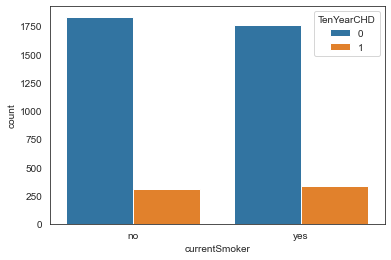

In [105]:
heart_fill_plot['currentSmoker']  = heart_fill_plot['currentSmoker'].replace({0: 'no', 1:'yes'})
sns.countplot(data=heart_fill_plot, x='currentSmoker', hue='TenYearCHD')

In [106]:
heart_fill['age'].value_counts()

40    191
46    182
42    180
41    174
48    173
39    169
44    166
45    162
43    159
52    149
51    146
55    145
38    144
47    141
50    140
53    139
54    132
49    132
57    123
56    123
59    119
58    117
60    111
61    110
63    110
62     99
64     93
37     92
36     84
65     57
67     45
35     42
66     38
68     18
34     18
69      7
33      5
70      2
32      1
Name: age, dtype: int64

In [125]:
def predict_80_20(df, target):
    split = StratifiedShuffleSplit(n_splits = 1, test_size=0.02, random_state=420)
    for train_index, test_index in split.split(df, df[target]):
        train = df.loc[train_index]
        test = df.loc[test_index]
        
        x = train.drop([target], axis=1)
        y = train[target]
        
        a = test.drop([target], axis=1)
        b = test[target]
        
        lr.fit(x,y)
        
        predicted = lr.predict(a)
        accuracy = accuracy_score(b, predicted)
        c_m = confusion_matrix(b, predicted)
        
        return print('Accuracy score: ', accuracy, '\n', 'Confusion matrix: ', c_m)

In [126]:
predict_80_20(heart_fill, 'TenYearCHD')


Accuracy score:  0.8470588235294118 
 Confusion matrix:  [[72  0]
 [13  0]]


C:\Users\ADMIN\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [127]:
heart_fill_ed = heart_fill.drop(['education'], axis = 1)


In [128]:
predict_80_20(heart_fill, 'TenYearCHD')


Accuracy score:  0.8470588235294118 
 Confusion matrix:  [[72  0]
 [13  0]]


C:\Users\ADMIN\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
